# Proyek Analisis Data

Nama: Haikal Algivari

Email: haikalalgivari6804@gmail.com

Dataset: Bike Sharing Dataset

# Menentukan Pertanyaan Bisnis

1. Bagaimana jumlah rental sepeda terhadap waktunya?

2. Bagaimana distribusi penyewaan sepeda berdasarkan musimnya?

3. Di antara tahun 2011 dan 2012, apakah terdapat perbedaan jumlah penyewaan sepeda?

4. Bagaimana jumlah penyewaan sepeda berdasarkan bulannya?

5. Untuk penyewaan sepeda per jam, bagaimana jumlah penyewaan sepeda berdasarkan jamnya?

# Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [4]:
df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')

Pada tahap ini, saya membuat dataframe menggunakan Pandas dengan membaca dataset yang memiliki format CSV. Terdapat 2 dataset, dataset 'hour.csv' yang berisi data rental sepeda per jam dengan dataframe bernama 'df_hour' dan dataset 'day.csv' yang berisi data rental sepeda per hari dengan dataframe bernama 'df_day'. Proses gathering data ini berguna untuk mengumpulkan dataset yang dibutuhkan dan menjadikannya dataframe agar lebih mudah untuk dianalisa.

## Assessing Data

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Di sini saya menggunakan fungsi `info()` untuk melihat informasi umum dari kedua dataframe. Dari hasilnya, dapat dilihat bahwa kedua dataframe tersebut memiliki kolom yang cukup sama, perbedaannya ialah pada df_day tidak memiliki kolom 'hr' karena penyewaan sepedan dilakukan per hari, sehingga memiliki 16 kolom. Sedangkan df_hour memiliki 17 kolom. Dataframe day_hour memiliki 17379 baris data dan df_day memiliki 731 baris data. Tidak terdapat missing value dari kedua dataframe.

Dataframe df_day memiliki 4 kolom dengan tipe data float, 11 kolom dengan tipe data integer, dan 1 kolom dengan tipe data object. Sedangkan pada df_hour terdapat tambahan 1 kolom dengan tipe data int yang berasal dari kolom 'hr'. Satu kolom object merupakan kolom 'dteday' yang merepresentasikan kolom tanggal. Karena tipe datanya berbeda dengan yang seharusnya, maka tipe datanya harus diubah menjadi tipe data waktu seperti datetime. Saya akan melakukannya di bagian cleaning data.

In [7]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [9]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [11]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [12]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


Di sini saya menggunakan fungsi `nunique()` yang digunakan untuk menghitung jumlah elemen unik dari dataframe. Ini sangat berguna untuk analisis data ketika kita ingin mengetahui berapa banyak nilai unik yang ada dalam kolom atau baris tertentu.

Dari banyaknya nilai unik dari tiap kolom tersebut, maka dapat disimpulkan bahwa pada df_day terdapat 9 kolom numerik (kolom 'dteday' kita anggap data numerik karena kita akan menganalisanya berdasarkan distribusinya) dan 7 kolom kategorikal (8 untuk df_hour ditambah dari kolom 'hr'). Kolom 'instant' memiliki unique value yang sama dengan banyaknya data, dan juga kolom tersebug juga merupakan index dari dataframe, yang berarti kolom ini tidak mengandung informasi berguna untuk analisa, sehingga kolom ini dapat di-drop saja. Kita akan lakukan di bagian cleaning data.

Kita kelompokkan data numerik dan data kategorikal ke dalam sebuah list agar lebih mudah diakses.

In [13]:
numerical_features = ['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

In [14]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [15]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Menggunakan fungsi `isnull()` yang dipadukan dengan `sum()` untuk melihat apakah terdapat missing value pada data. Hasilnya memperlihatkan bahwa tidak terdapat missing value sehingga tidak perlu dilakukan penanganan yang lebih lanjut terhadap missing value.

In [16]:
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

print('Outlier pada df_hour')
for column in numerical_features:
  if column != 'dteday':
    outliers = detect_outliers_iqr(df_hour[column])
    print(f"Kolom '{column}' memiliki {len(outliers)} outlier")

print()

print('Outlier pada df_day')
for column in numerical_features:
  if column != 'dteday':
    outliers = detect_outliers_iqr(df_day[column])
    print(f"Kolom '{column}' memiliki {len(outliers)} outlier")

Outlier pada df_hour
Kolom 'instant' memiliki 0 outlier
Kolom 'temp' memiliki 0 outlier
Kolom 'atemp' memiliki 0 outlier
Kolom 'hum' memiliki 22 outlier
Kolom 'windspeed' memiliki 342 outlier
Kolom 'casual' memiliki 1192 outlier
Kolom 'registered' memiliki 680 outlier
Kolom 'cnt' memiliki 505 outlier

Outlier pada df_day
Kolom 'instant' memiliki 0 outlier
Kolom 'temp' memiliki 0 outlier
Kolom 'atemp' memiliki 0 outlier
Kolom 'hum' memiliki 2 outlier
Kolom 'windspeed' memiliki 13 outlier
Kolom 'casual' memiliki 44 outlier
Kolom 'registered' memiliki 0 outlier
Kolom 'cnt' memiliki 0 outlier


Di sini saya mendeteksi outlier dengan metode IQR, yang mana menggunakan kuartil bawah dikurang dengan 1.5 yang dikali dengan IQR sebagai batas bawah dan kuartil atas ditambah dengan 1.5 yang dikali dengan IQR sebagai batas atas. Deteksi hanya dilakukan untuk data numerik.

Pada df_hour, terdapat missing value pada kolom 'hum', 'windspeed', 'casual', 'registered', dan 'cnt'. Pada df_day, terdapat missing value pada kolom 'hum', 'windspeed', dan 'casual'.

Karena kita hanya akan melakukan analisis data dan tidak sampai tahap machine learning, maka kita tidak perlu melakukan handle terhadap outlier karena kita memerlukan data original untuk analisa data.

In [17]:
# Cek duplikat pada df_hour
duplicate_rows_hour = df_hour[df_hour.duplicated()]
print(f"Jumlah baris duplikat pada df_hour: {duplicate_rows_hour.shape[0]}")

# Cek duplikat pada df_day
duplicate_rows_day = df_day[df_day.duplicated()]
print(f"Jumlah baris duplikat pada df_day: {duplicate_rows_day.shape[0]}")

Jumlah baris duplikat pada df_hour: 0
Jumlah baris duplikat pada df_day: 0


Di sini saya menggunakan fungsi `duplicated()` untuk melihat baris yang duplikat dalam data. Hasilnya memperlihatkan bahwa tidak terdapat data yang duplikat sehingga tidak diperlukan penanganan terhadap duplicate data.

## Cleaning Data

In [18]:
df_hour.drop('instant', axis=1, inplace=True)
df_day.drop('instant', axis=1, inplace=True)

Melakukan drop terhadap kolom 'instant' dengan menggunakan fungsi drop() karena tidak memiliki informasi yang berharga dalam proses analisis data mengingat kolom ini hanya bertindak sebagai index dari data.

In [19]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

Merubah tipe data dari kolom 'dteday' yang awalnya object menjadi datetime dengan menggunakan fungsi pd.to_datetime(). Ini dilakukan agar kolom tersebut dapat dianalisa dengan mudah sesuai dengan format tanggal.

In [20]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [21]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


Menggunakan fungsi `info()` untuk mengecek kembali dataframe setelah dilakukannya proses cleaning data.

# Exploratory Data Analysis (EDA)

## Eksplorasi Kolom dteday

Kolom dteday merupakan kolom yang merepresentasikan tanggal dari rental sepeda yang terjadi.

In [22]:
df_hour['dteday'].describe()

,dteday
count,17379
mean,2012-01-02 04:08:34.552045568
min,2011-01-01 00:00:00
25%,2011-07-04 00:00:00
50%,2012-01-02 00:00:00
75%,2012-07-02 00:00:00
max,2012-12-31 00:00:00


In [23]:
df_day['dteday'].describe()

,dteday
count,731
mean,2012-01-01 00:00:00
min,2011-01-01 00:00:00
25%,2011-07-02 12:00:00
50%,2012-01-01 00:00:00
75%,2012-07-01 12:00:00
max,2012-12-31 00:00:00


Menggunakan fungsi `describe()` untuk melihat deskripsi umum dari dataframe. Dari deskripsi tersebut, diketahui bahwa perentalan sepeda dimulai dari awal tahun 2011 hingga akhir tahun 2012.

Dari kolom dteday, kita dapat melakukan visualisasi terhadap distribusi hari dalam sebulan

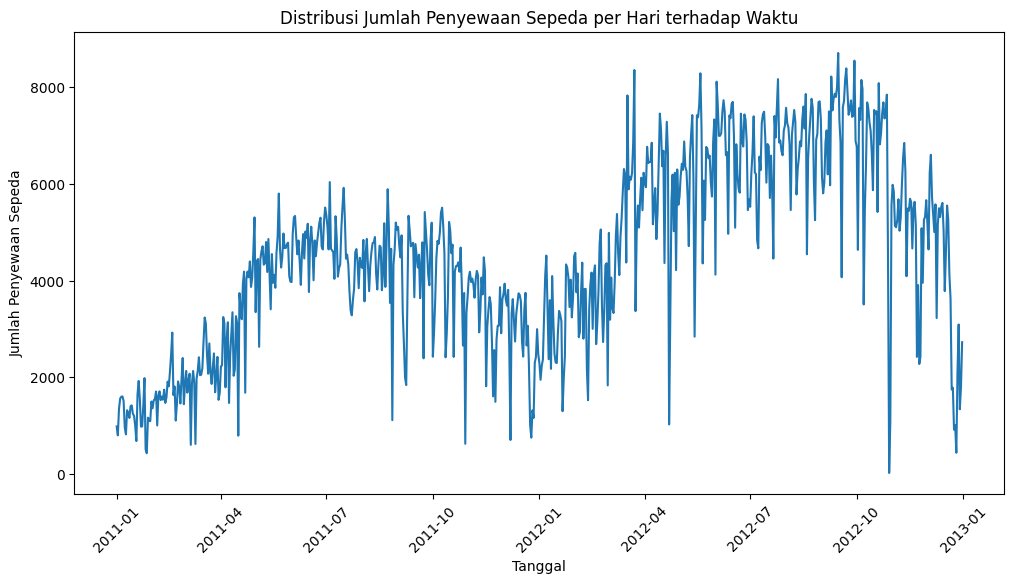

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

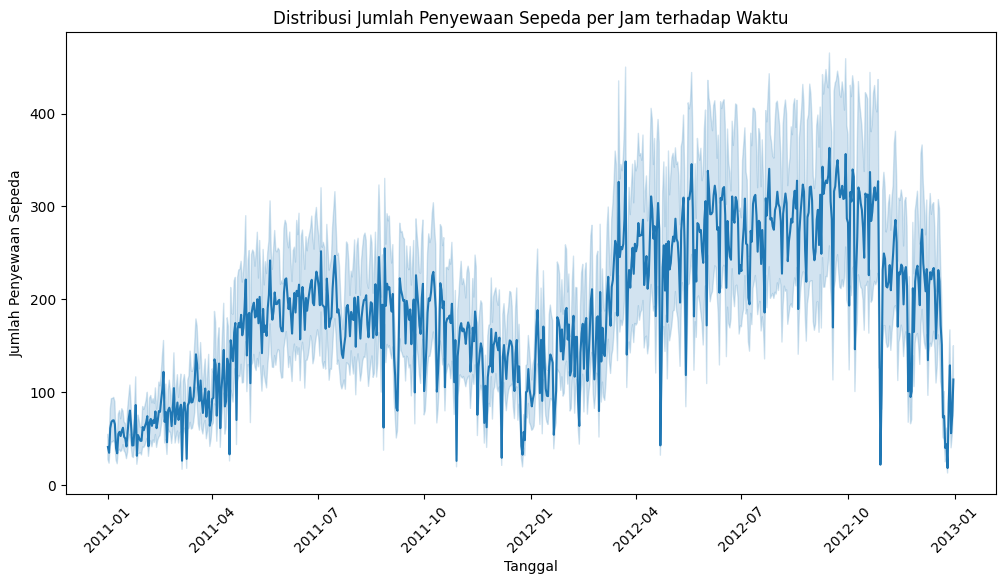

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

Di sini saya melakukan visualisasi jumlah penyewaan sepeda terhadap waktu dengan menggunakan line chart. Kolom yang digunakan ialah cnt dan dteday. Dari visualisasi tersebut, terlihat bahwa terjadi peningkatan dari awal tahun 2011 hingga ke bulan ke-7 tahun 2011, lalu terjadi penurunan sedikit hingga akhir tahun 2011, lalu kembali naik dengan signifikan hingga bulan 9 tahun 2012 sebelum kemudian mengalami penurunan yang cukup drastis hingga akhir tahun 2012.

Dapat dilihat pola bahwa selalu terjadi penurunan saat awal dan akhir tahun, sedangkan selalu terjadi kenaikan di pertengahan tahun. Ini dapat menjawab pertanyaan 1.

## Eksplorasi Kolom season

Kolom season merupakan kolom yang merepresentasikan musim pada saat terjadinya penyewaan sepeda.

In [26]:
df_hour['season'].value_counts()

,count
season,
3,4496
2,4409
1,4242
4,4232


In [27]:
df_day['season'].value_counts()

,count
season,
3,188
2,184
1,181
4,178


Di sini saya menggunakan fungsi `value_counts()` untuk melihat banyaknya kemunculan unique value dari suatu kolom. Kategori 1 untuk springer; kategori 2 untuk summer; kategori 3 untuk fall; dan kategori 4 untuk winter.

Berdasarkan hasilnya, dapat dilihat bahwa musim dengan kategori 3 memiliki frekuensi penyewaan yang paling tinggi, disusul dengan kategori 2, kategori 1, dan terakhir kategori 4. Karena perbedaan tidak cukup signifikan, mari lihat visualisasi kolom ini terhadap jumlah penyewaan yang terjadi.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


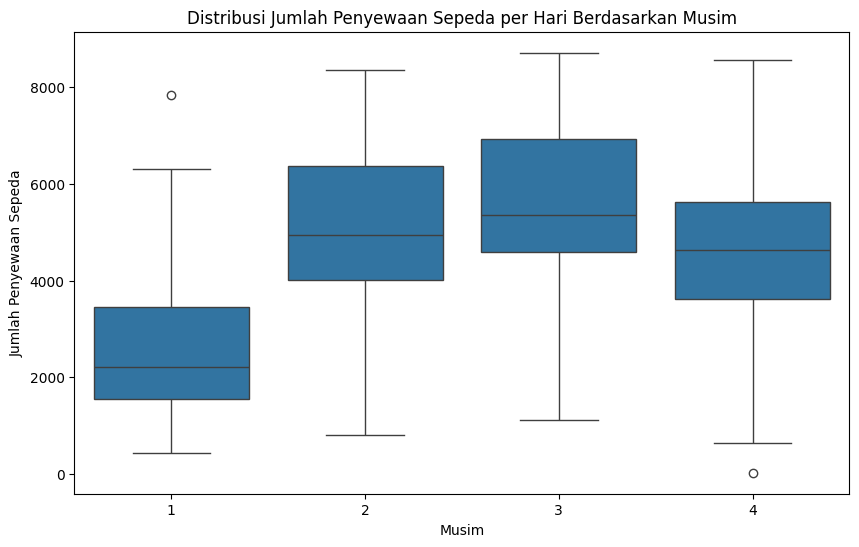

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


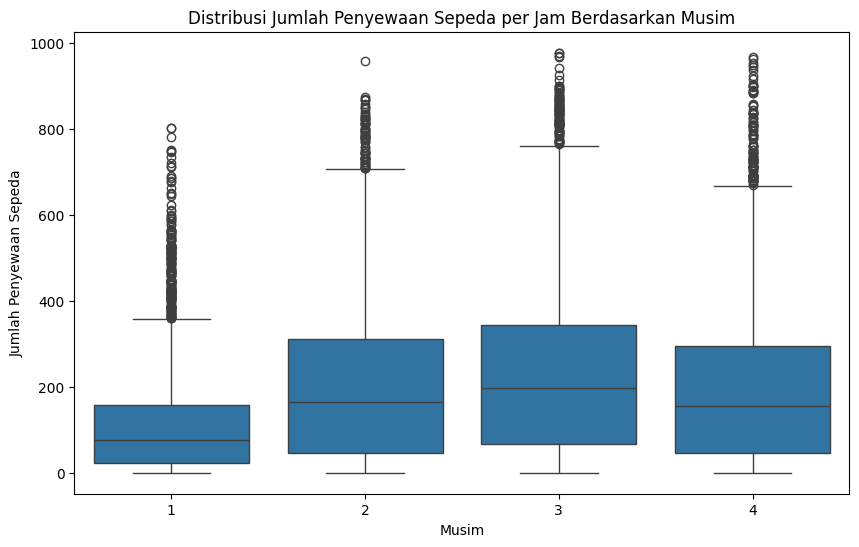

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Di sini saya melakukan visualisasi jumlah penyewaan berdasarkan musimnya dengan menggunakan box plot. Di sini menggunakan kolom season dan cnt. Berdasarkan hasilnya, kita dapat melihat bahwa musim dengan kategori 1 (springer) memiliki jumlah penyewaan yang cukup sedikit jika dibandingkan dengan musim lainnya. Ini dapat menjawab pertanyaan nomor 2.

## Eksplorasi Kolom yr

Kolom yr merupakan kolom yang merepresentasikan tahun pada saat terjadinya penyewaan sepeda.

In [30]:
df_hour['yr'].value_counts()

,count
yr,
1,8734
0,8645


In [31]:
df_day['yr'].value_counts()

,count
yr,
1,366
0,365


Di sini saya menggunakan fungsi `value_counts()` dan melakukan visualisasi untuk melihat banyaknya kemunculan unique value dari suatu kolom. Ketegori 0 untuk tahun 2011 dan kategori 1 untuk tahun 2012.

Berdasarkan hasilnya, dapat dilihat bahwa kategori 1 memiliki frekuensi penyewaan lebih tinggi daripada kategori 0, namun perbedaannya tidak terlalu jauh. Maka dari itu, mari kita lihat banyaknya penyewaan yang terjadi berdasarkan tahunnya.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


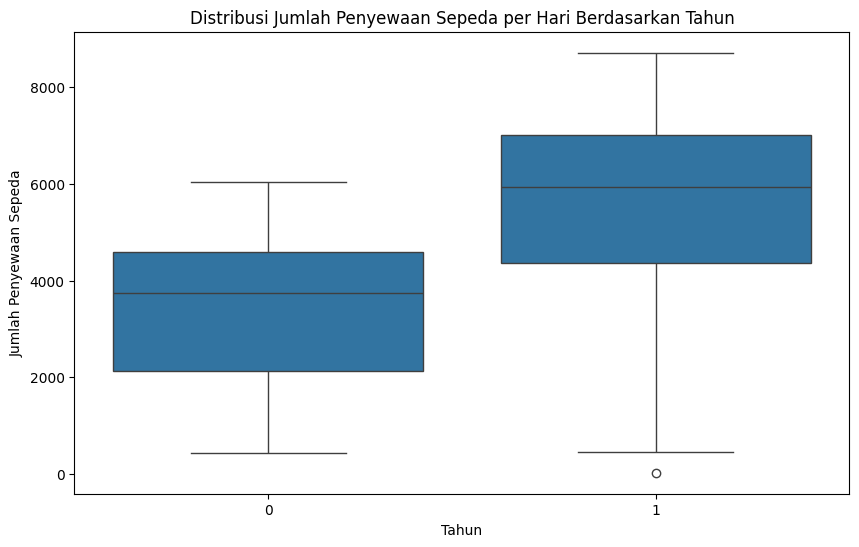

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


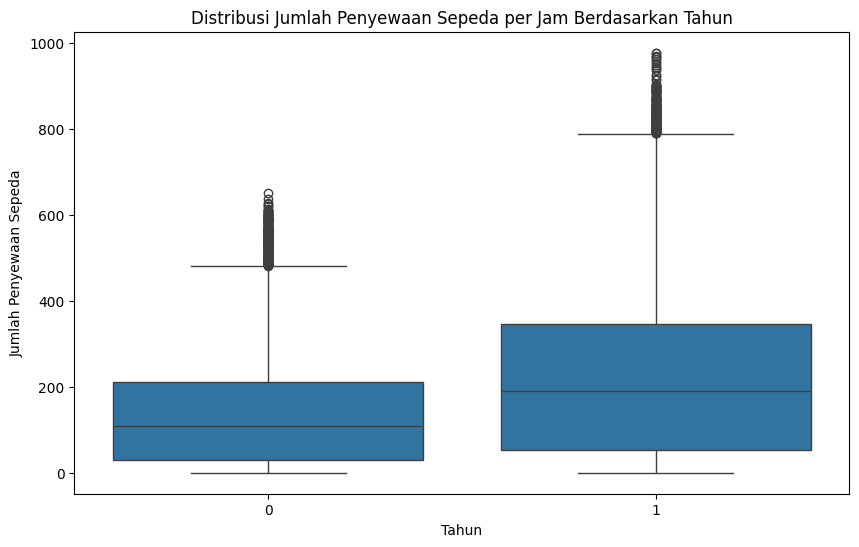

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Di sini saya melakukan visualisasi distribusi banyaknya penyewaan sepeda berdasarkan tahunnya dengan menggunakan box plot. Dapat dilihat bahwa tahun 2012 juga merupakan tahun dengan jumlah penyewaan terbanyak dibanding tahun 2011. Ini juga dapat terlihat melalui visualisasi distribusi banyaknya penyewaan terhadap waktu sebelumnya yang mana tahun 2012 mengalami peningkatan penyewaan lebih tinggi daripada tahun 2011. Ini dapat digunakan untuk menjawab pertanyaan 3.

## Eksplorasi Kolom mnth

Kolom mnth merupakan kolom yang merepresentasikan bulan pada saat terjadinya penyewaan sepeda.

In [34]:
df_hour['mnth'].value_counts()

,count
mnth,
5,1488
7,1488
12,1483
8,1475
3,1473
10,1451
6,1440
4,1437
9,1437


In [35]:
df_day['mnth'].value_counts()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


Di sini saya menggunakan fungsi value_counts() dan melakukan visualisasi untuk melihat banyaknya kemunculan unique value dari suatu kolom. Kategori 1-12 menandakan bulan 1-12.

Berdasarkan hasilnya, dapat dilihat bahwa bulan 5 dan 7 menjadi bulan-bulan dengan penyewaan per jam terbanyak, dan bulan 1, 3, 5, 7, 8, 10, dan 12 menjadi bulan-bulan dengan penyewaan per hari terbanyak. Namun perbedaannya tidak terlalu signifikan sehingga kita perlu melihat distribusi banyaknya penyewaan berdasarkan bulannya.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


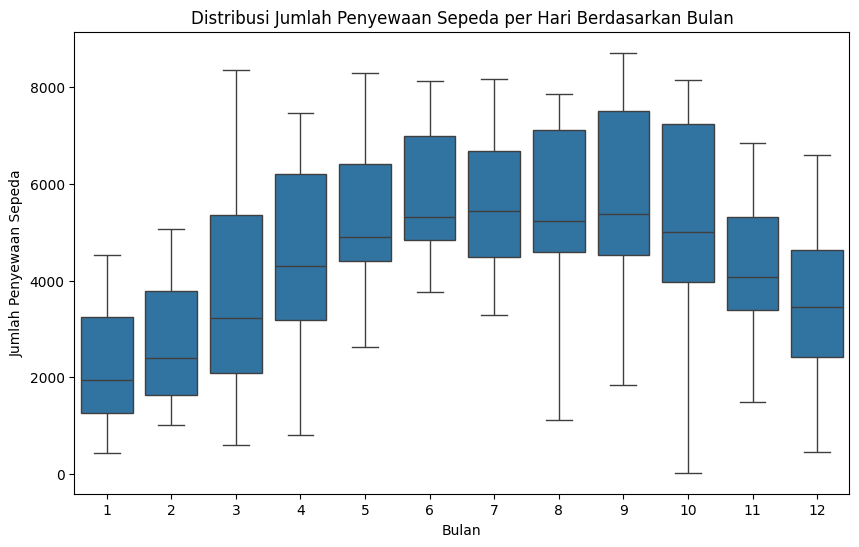

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


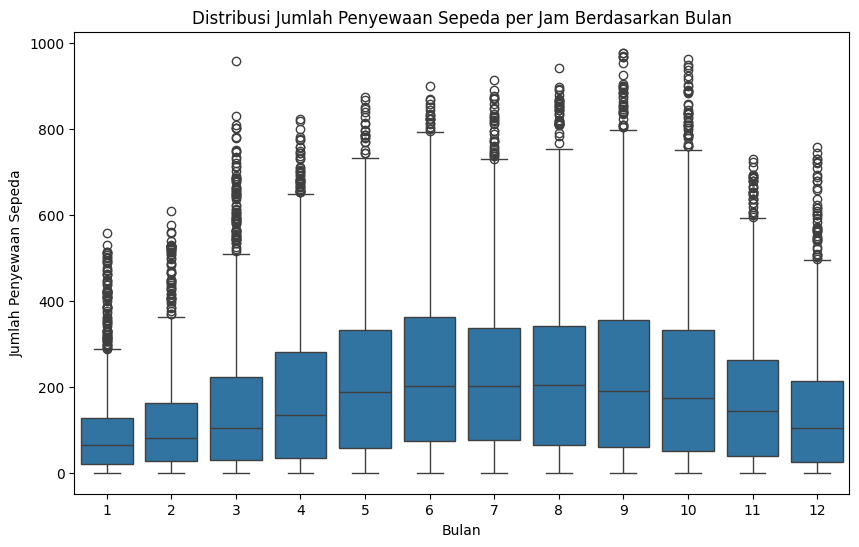

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Di sini saya melakukan visualisasi jumlah penyewaan sepeda berdasarkan bulannya dengan menggunakan box plot. Dapat dilihat bahwa terjadi peningkatan pada pertengahan bulan dan penurunan pada awal dan akhir bulan. Distribusi ini sesuai dengan distribusi jumlah penyewaan terhadap waktu sebelumnya. Ini dapat digunakan untuk menjawab pertanyaan 4

## Eksplorasi Kolom hr

Kolom hr merupakan kolom yang hanya ada pada df_hour karena datanya merupakan data penyewaan sepeda per jam. Kolom ini merepresentasikan pada jam berapa terjadinya penyewaan sepeda per jam.

In [38]:
df_hour['hr'].value_counts()

,count
hr,
17,730
16,730
13,729
15,729
14,729
12,728
22,728
21,728
20,728


Di sini saya menggunakan fungsi value_counts() dan melakukan visualisasi untuk melihat banyaknya kemunculan unique value dari suatu kolom. Kategori 0-23 menandakan jam 0-23.

Berdasarkan hasilnya, dapat dilihat bahwa perbedaan distribusi tidak terlalu signifikan sehingga diperlukan visualisasi distribusi jumlah penyewaan sepeda terhadap jamnya.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


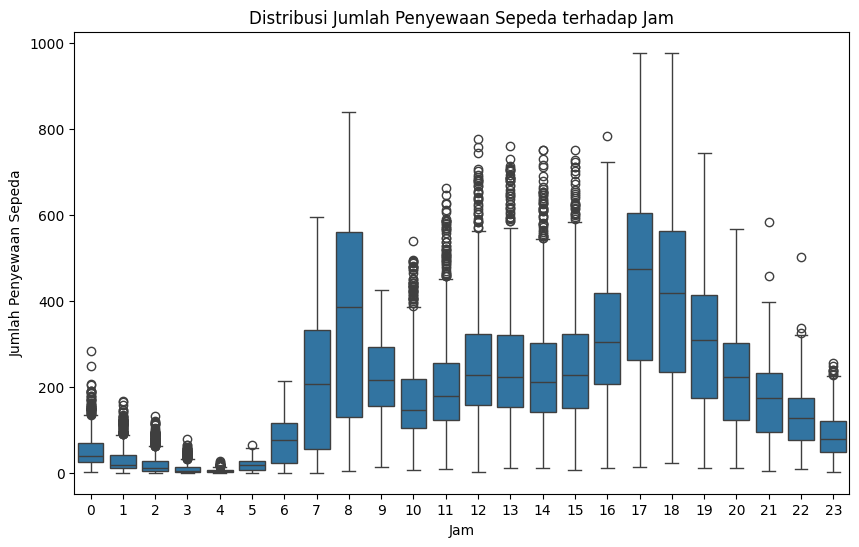

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda terhadap Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Di sini saya melakukan visualisasi distribusi jumlah penyewaan sepeda terhadap jamnya menggunakan box plot. Dapat dilihat bahwa terdapat lonjakan jumlah penyewaan sepeda di sekitar jam 8 pagi dan di sekitar jam 5-6 sore. Lalu juga terdapat penurunan jumlah penyewaan sepeda pada waktu dini hari (jam 0-5). Ini dapat menjawab pertanyaan 5

# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana jumlah rental sepeda terhadap waktunya?

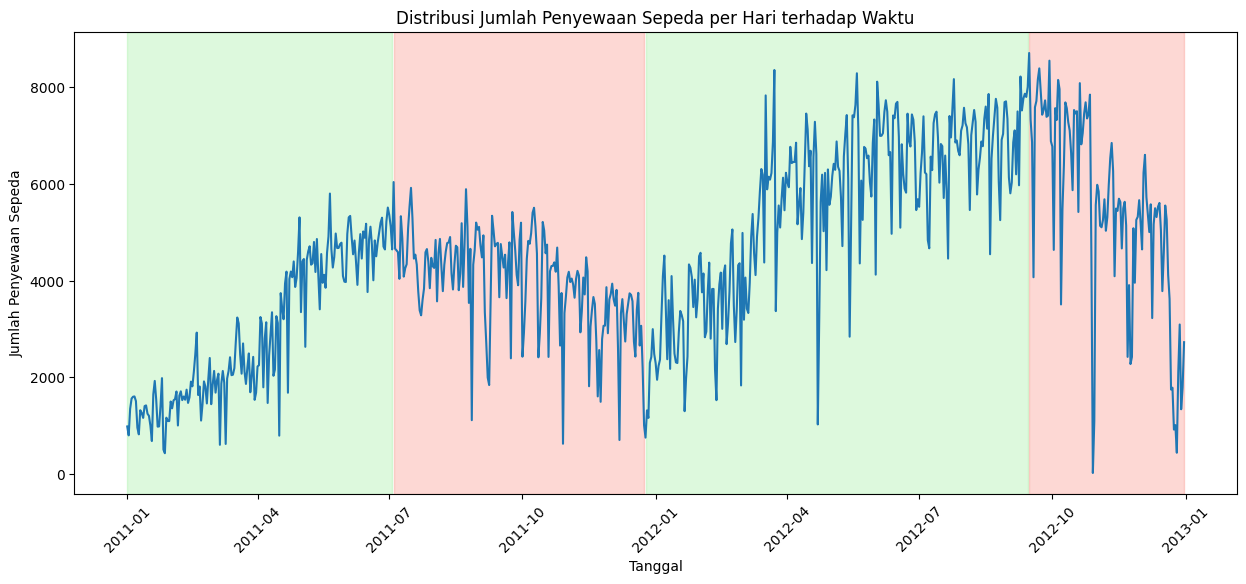

In [40]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)

# Peningkatan Pertama
plt.axvspan('2011-01-01', '2011-07-03', color='lightgreen', alpha=0.3)

# Penurunan Pertama
plt.axvspan('2011-07-04', '2011-12-24', color='salmon', alpha=0.3)

# Peningkatan Kedua
plt.axvspan('2011-12-25', '2012-09-14', color='lightgreen', alpha=0.3)

# Penurunan Kedua
plt.axvspan('2012-09-15', '2012-12-31', color='salmon', alpha=0.3)

plt.show()

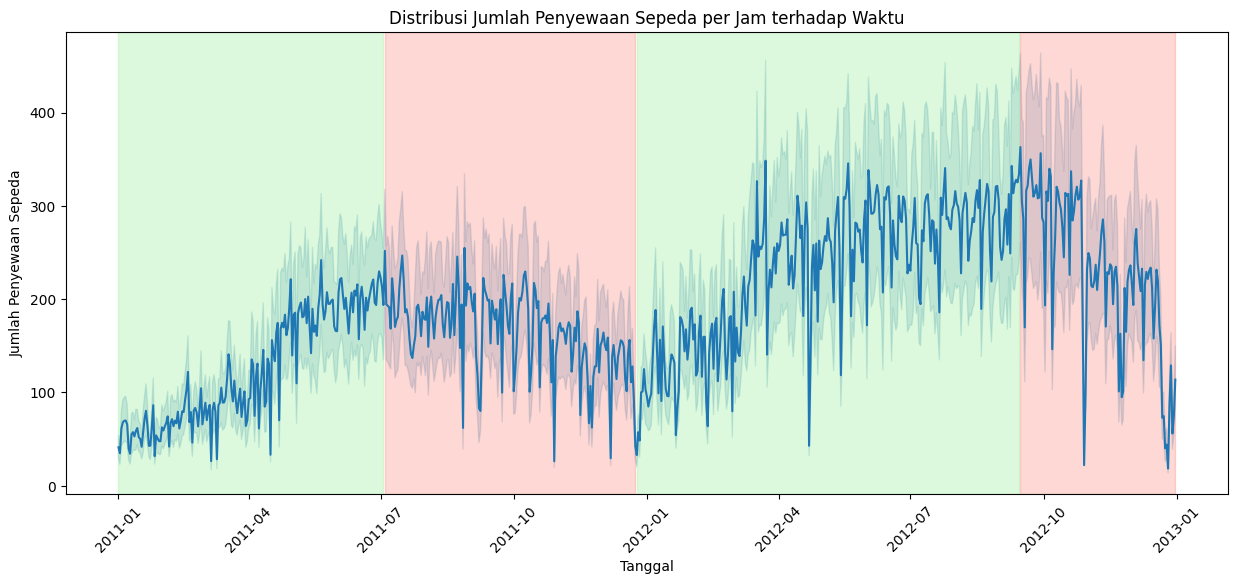

In [41]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)

# Peningkatan Pertama
plt.axvspan('2011-01-01', '2011-07-03', color='lightgreen', alpha=0.3)

# Penurunan Pertama
plt.axvspan('2011-07-04', '2011-12-24', color='salmon', alpha=0.3)

# Peningkatan Kedua
plt.axvspan('2011-12-25', '2012-09-14', color='lightgreen', alpha=0.3)

# Penurunan Kedua
plt.axvspan('2012-09-15', '2012-12-31', color='salmon', alpha=0.3)

plt.show()

Jumlah rental sepeda selalu mengalami fluktuasi. Namun kita dapat melihat pola musiman atau seasonal pada visualisasi di atas. Dapat dilihat bahwa pola musiman terjadi per tahunnya, dimana terjadi kenaikan pada pertengahan tahun dan terjadi penurunan pada awal dan akhir tahun. Hal ini terjadi pada 2 tahun yang kita analisis (tahun 2011-2012), walaupun dengan tingkat kenaikan dan penurunan yang berbeda, namun tetap pada pola musiman yang sama.

## Pertanyaan 2: Bagaimana distribusi penyewaan sepeda berdasarkan musimnya?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


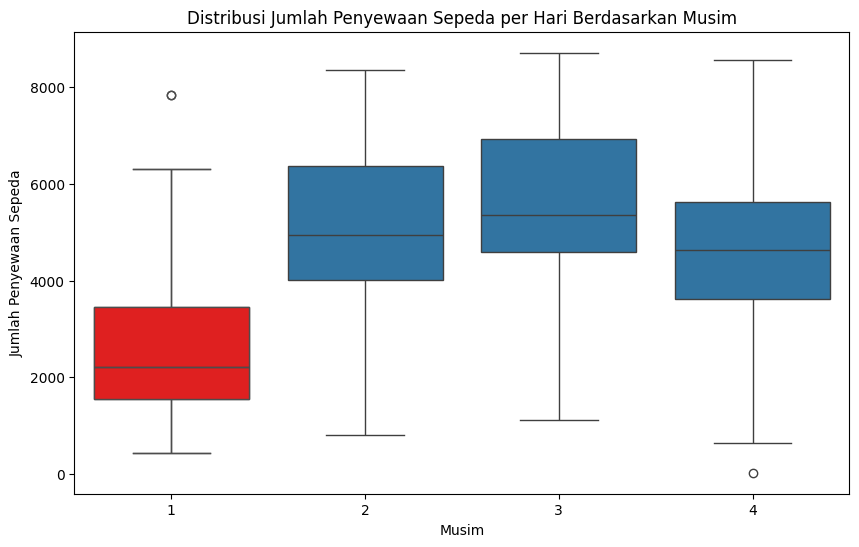

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

sns.boxplot(x='season', y='cnt', data=df_day[df_day['season'] == 1], color='red')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


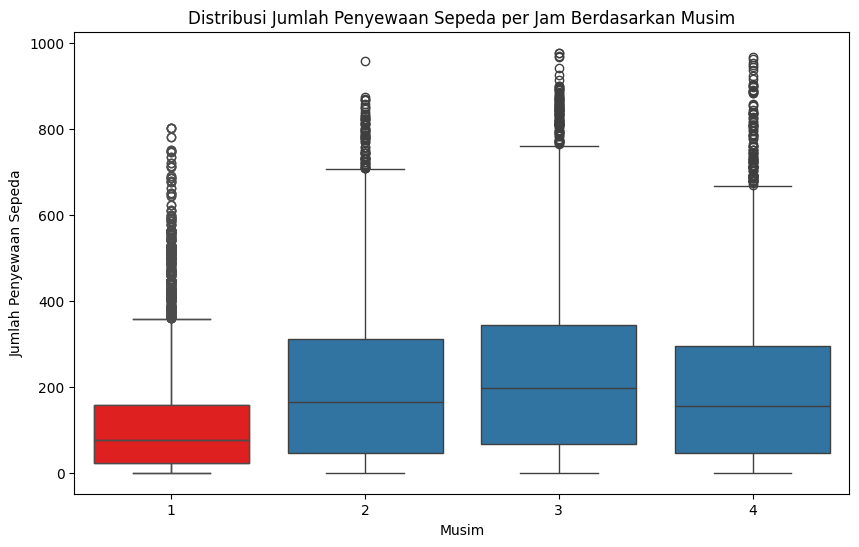

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

sns.boxplot(x='season', y='cnt', data=df_hour[df_hour['season'] == 1], color='red')

plt.show()

Visualisasi berikut merupakan jumlah penyewaan sepeda berdasarkan musimnya. Di sini, kategori 1 menandakan springer (musim semi), kategori 2 menandakan summer (musim panas), kategori 3 menandakan fall (musim gugur), dan kategori 4 menandakan winter (musim dingin).

Berdasarkan visualisasi tersebut, dapat dilihat bahwa springer menjadi musim yang mengalami penurunan jumlah penyewaan sepeda di antara musim lainnya. Ini kemungkinan terjadi dikarenakan terjadi karena musim tersebut terjadi di saat jumlah penyewaan sepeda sedang turun seperti pada visualisasi terhadap waktu sebelumnya. Walaupun musim tersebut sebenarnya sangat cocok digunakan untuk melakukan aktivitas bersepedaan.

## Pertanyaan 3: Di antara tahun 2011 dan 2012, apakah terdapat perbedaan jumlah penyewaan sepeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

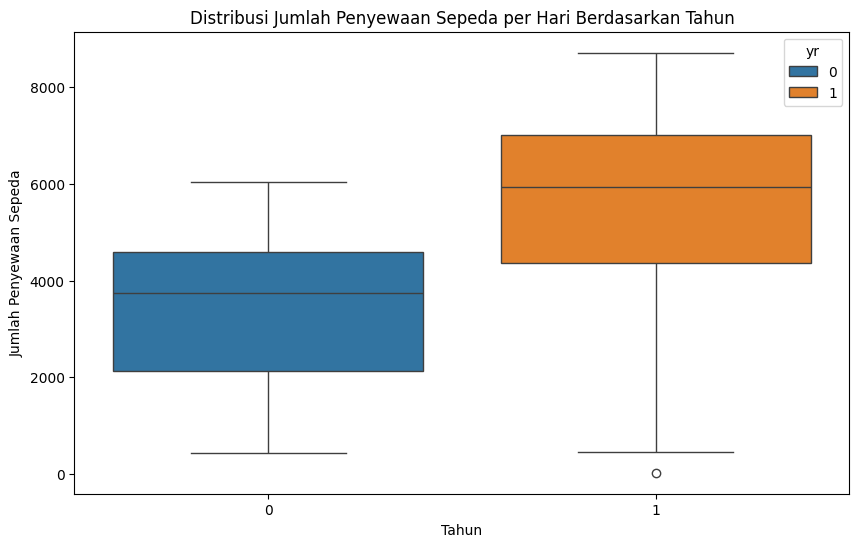

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

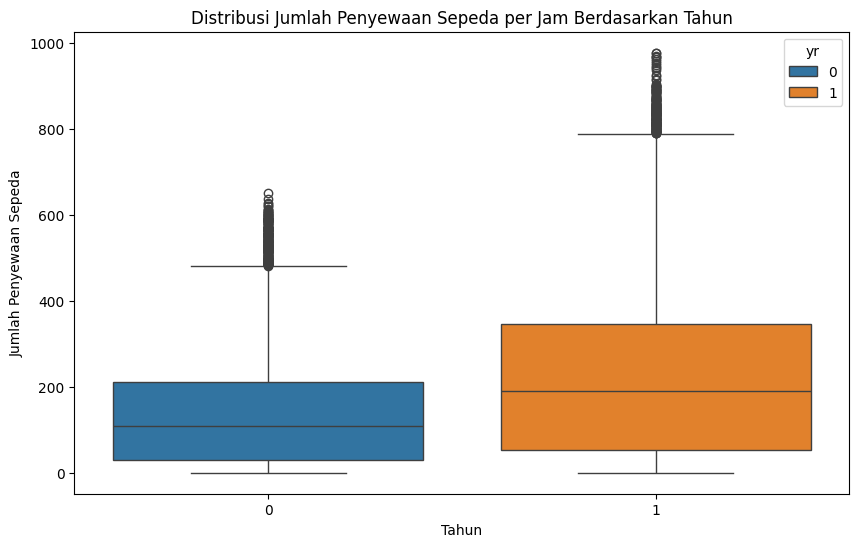

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr', y='cnt', data=df_day, hue='yr')
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='yr', y='cnt', data=df_hour, hue='yr')
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Visualisasi di atas merupakan jumlah penyewaan sepeda berdasarkan tahunnya. Dataset hanya mencakup 2 tahun, yaitu tahun 2011 dan 2012. Kategori 0 menandakan tahun 2011 dan kategori 1 menandakan tahun 2012.

Berdasarkan visualisasi tersebut, dapat dilihat bahwa tahun 2012 memiliki angka penyewaan sepeda yang lebih tinggi dibandingkan dengan tahun 2011. Ini sejalan dengan visualisasi terhadap waktu sebelumnya, di mana kita dapat melihat bahwa walaupun mengalami pola musiman yang sama, namun tahun 2012 terlihat lebih tinggi dalam jumlah penyewaan daripada tahun sebelumnya. Dari sini, kemungkinan penyewaan pada tahun berikutnya juga dapat mengalami peningkatan selama tidak ada faktor ekternal yang dapat mengganggu jalannya bisnis.

## Pertanyaan 4: Bagaimana jumlah penyewaan sepeda berdasarkan bulannya?

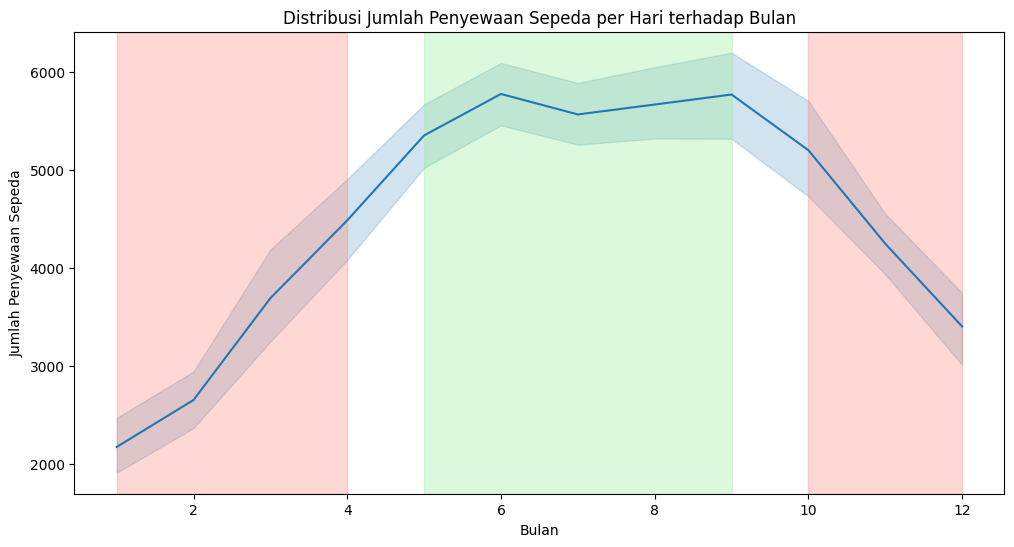

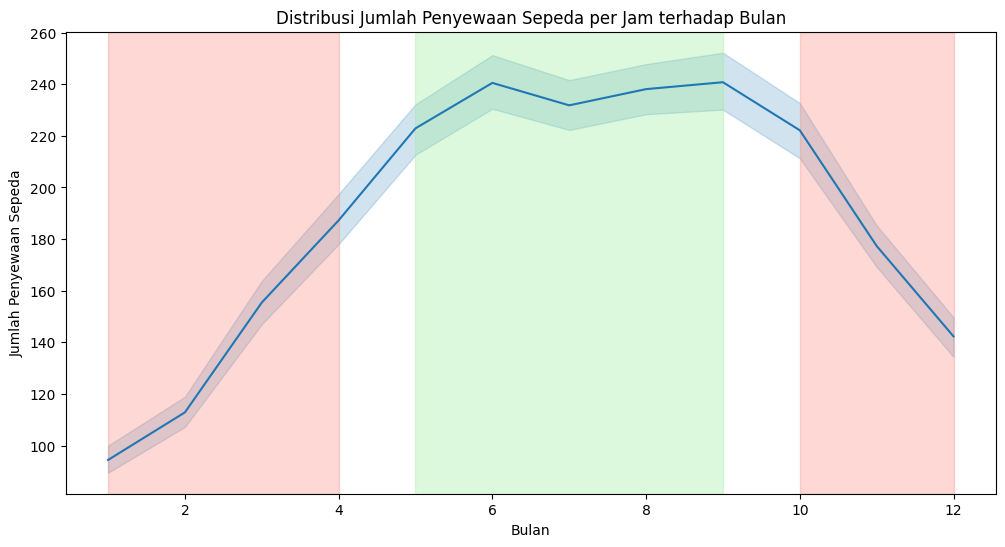

In [45]:
# Buat visualisasi untuk df_day
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=df_day)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari terhadap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menandai area kenaikan dan penurunan
plt.axvspan(1, 4, color='salmon', alpha=0.3)  # Area penurunan
plt.axvspan(5, 9, color='lightgreen', alpha=0.3)  # Area kenaikan
plt.axvspan(10, 12, color='salmon', alpha=0.3)  # Area penurunan

plt.show()


# Buat visualisasi untuk df_hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam terhadap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menandai area kenaikan dan penurunan
plt.axvspan(1, 4, color='salmon', alpha=0.3)  # Area penurunan
plt.axvspan(5, 9, color='lightgreen', alpha=0.3)  # Area kenaikan
plt.axvspan(10, 12, color='salmon', alpha=0.3)  # Area penurunan

plt.show()

Visualisasi di atas merupakan jumlah penyewaan sepeda berdasarkan bulannya. Kategori dari 1-12 menandakan bulan 1-12.

Berdasarkan visualisasi tersebut, dapat dilihat bahwa terdapat kenaikan pada bulan pertengahan dan terjadi penurunan pada awal dan akhir bulan. Ini sejalan dengan visualisasi terhadap waktu sebelumnya yang mana walaupun memiliki frekuensi kenaikan dan penurunan yang berbeda antara tahun 2011 dan 2012, namun tetap terlihat pola musiman dimana selalu terjadi kenaikan di bulan pertengahan dan penurunan pada bulan awal dan bulan akhir.

## Pertanyaan 5: Untuk penyewaan sepeda per jam, bagaimana jumlah penyewaan sepeda berdasarkan jamnya?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


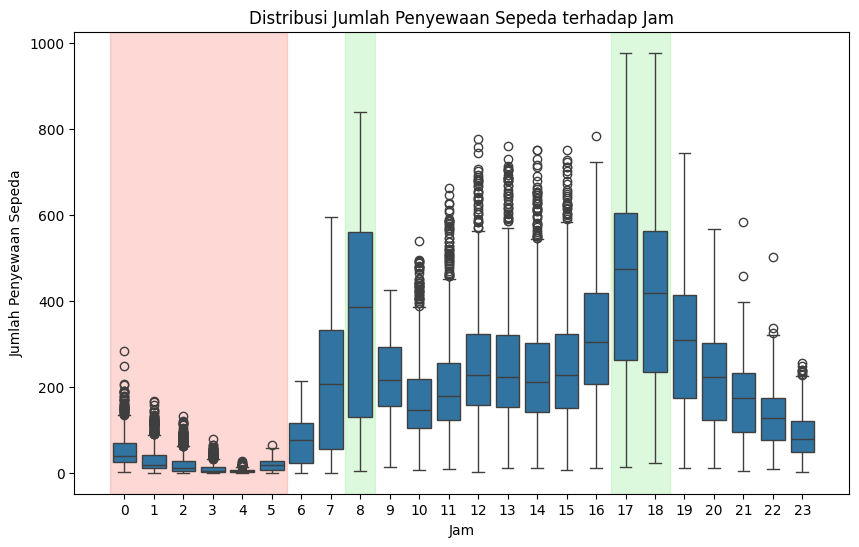

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Penyewaan Sepeda terhadap Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menandai jam 8 dan jam 17-18
plt.axvspan(7.5, 8.5, color='lightgreen', alpha=0.3)  # Menandai jam 8
plt.axvspan(16.5, 18.5, color='lightgreen', alpha=0.3)  # Menandai jam 17-18

# Menandai jam 0-5
plt.axvspan(-0.5, 5.5, color='salmon', alpha=0.3)  # Menandai jam 0-5

plt.show()

Visualisasi di atas merupakan jumlah penyewaan sepeda berdasarkan jamnya. Kategori 0-23 menandakan jam 0-23 dalam sehari.

Berdasarkan visualisasi tersebut, dapat dilihat bahwa jumlah penyewaan sepeda bergantung pada jam-jam tertentu. Jam 8 pagi dan jam 17-18 memiliki jumlah penyewaan yang tinggi, sedangkan jam 0-5 dini hari memiliki jumlah penyewaan yang rendah. Jam-jam yang mengalami kenaikan dikarenakan pada jam-jam tersebut, cuaca tidak terlalu buruk sehingga baik untuk melakukan aktivitas bersepeda. Sedangkan pada jam yang mengalami penurunan terjadi karena jam tersebut merupakan waktu dini hari, yang mana waktu tersebut merupakan waktu istirahat bagi manusia sehingga jumlah penyewaan pun juga ikut turun.

# Analisis Lanjutan

## Analisis Korelasi

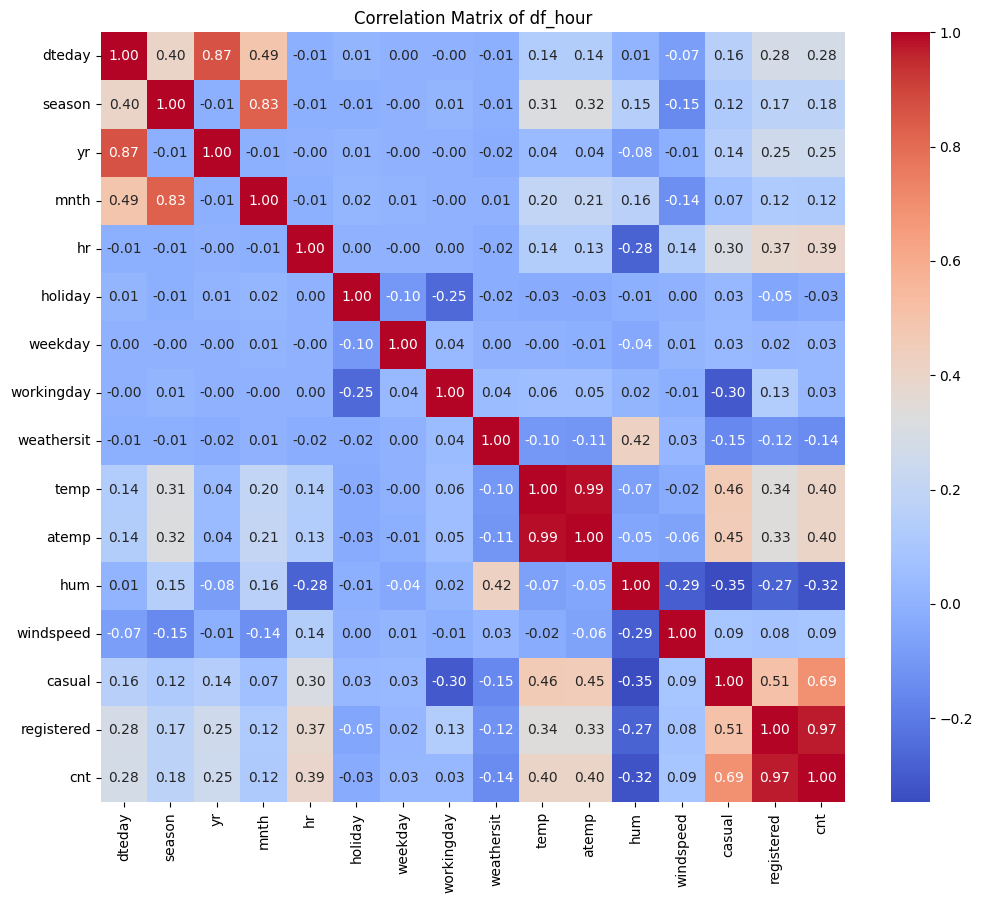

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [53]:
# Calculate the correlation matrix
correlation_matrix = df_hour.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_hour')
plt.show()

# Print the correlation with 'cnt' column
print(correlation_matrix['cnt'].sort_values(ascending=False))

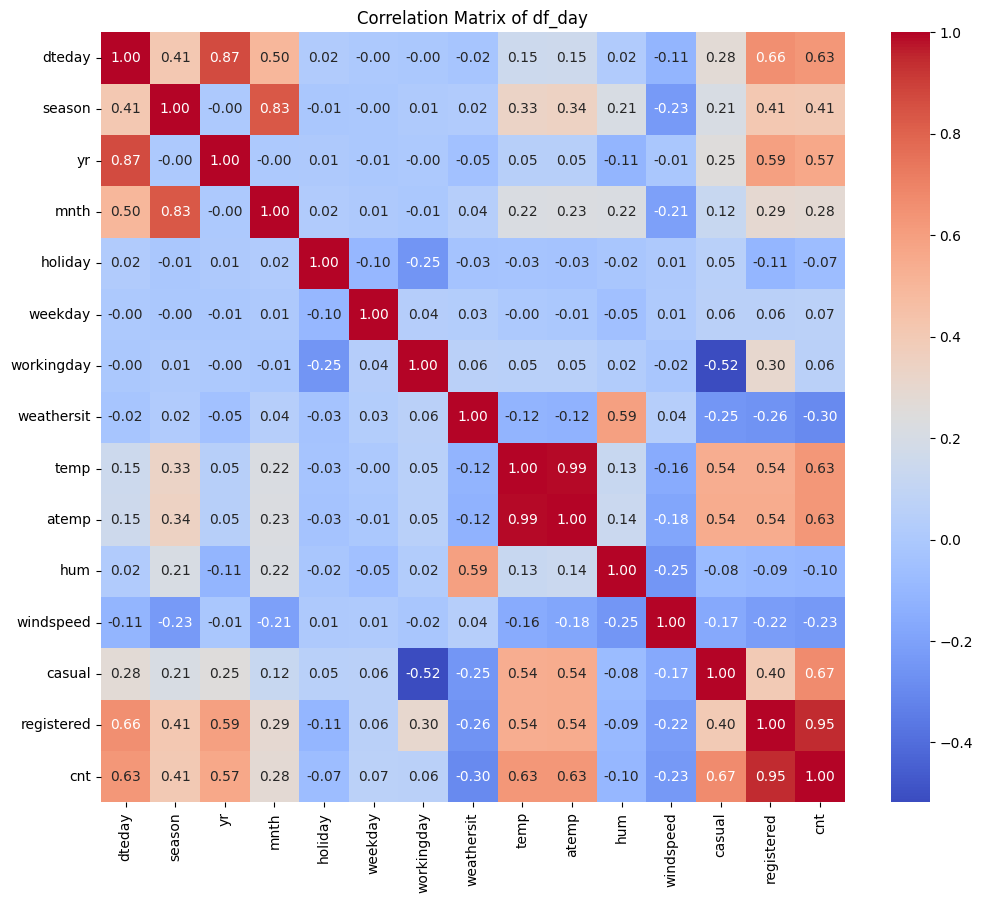

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [54]:
# Calculate the correlation matrix
correlation_matrix_day = df_day.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_day')
plt.show()

# Print the correlation with 'cnt' column
print(correlation_matrix_day['cnt'].sort_values(ascending=False))


Di sini saya melakukan analisis lanjutan berupa analisa korelasi terhadap kolom cnt (karena cnt merepresentasikan total penyewaan sepeda yang terjadi).

Pada data penyewaan sepeda per jam, dapat dilihat bahwa terdapat 2 kolom yang berkorelasi lebih dari 50% dengan kolom cnt, yaitu registered dan casual. Ini terjadi dikarenakan cnt sendiri merupakan hasil penjumlahan antara registered dan casual, sehingga nilai cnt bergantung pada nilai registered dan casual.

Sedangkan pada data penyewaan sepeda per hari, dapat dilihat bahwa terdapat 6 kolom dengan korelasi lebih dari 50% dengan kolom cnt, yaitu registered, casual, atemp, dteday, temp, dan yr. Kolom atemp sendiri merupakan suhu yang dirasakan manusia dalam celcius dan nilainya telah dinormalisasi dan temp merupakan suhu sebenarnya pada saat perentalan terjadi dalam celcius dan nilainya juga telah dinormalisasi. Dengan begitu, dapat disimpulkan bahwa keenam kolom tersebut memiliki hubungan yang cukup kuat dengan jumlah penyewaan sepeda per hari.

## Time Series Decomposition

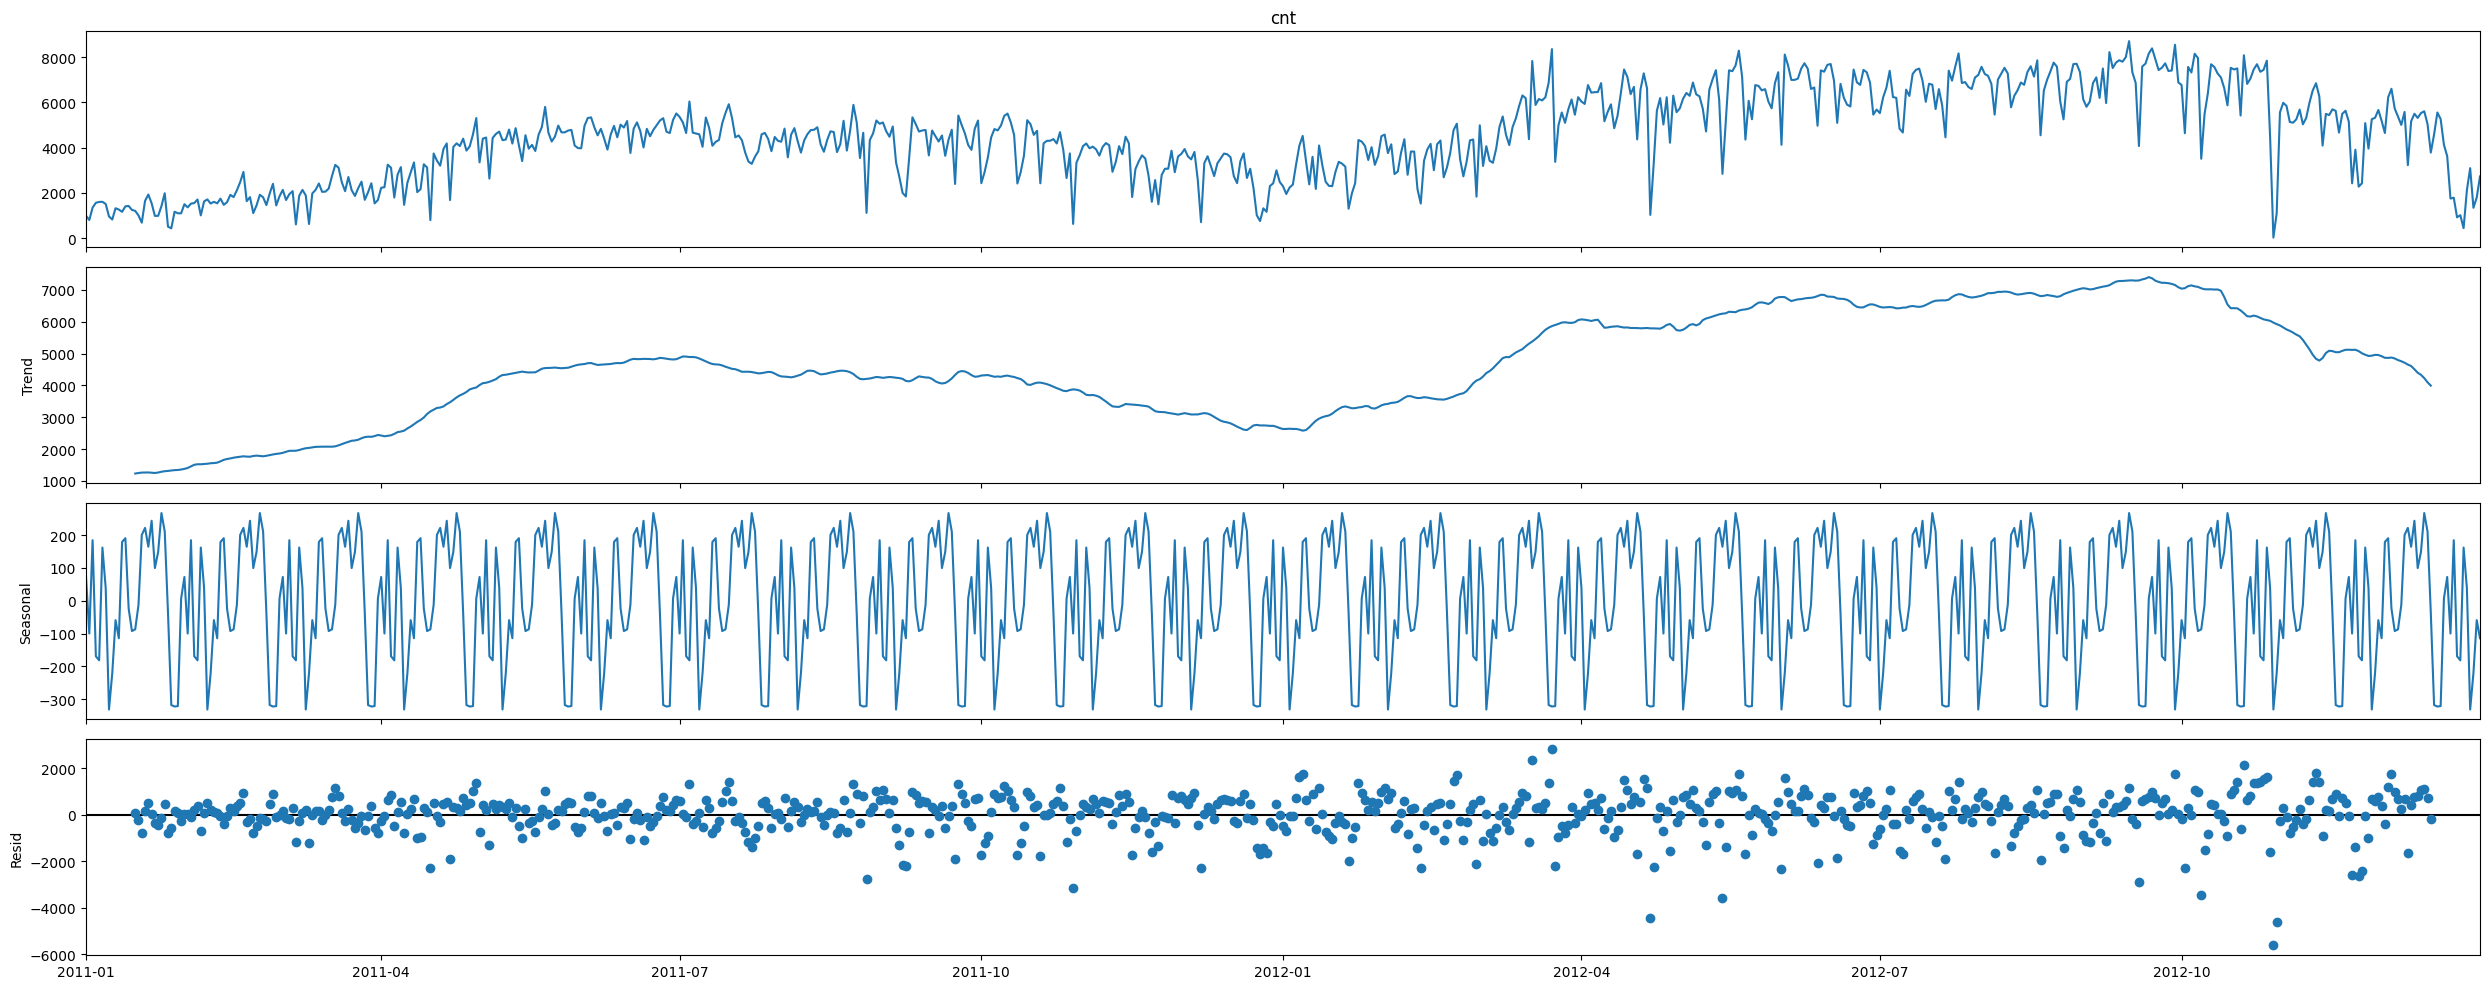

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample data to daily frequency for better visualization
df_hour_daily = df_hour.groupby('dteday')['cnt'].sum()

# Decompose the time series
decomposition = seasonal_decompose(df_hour_daily, model='additive', period=30)

# Plot the decomposition
plt.rcParams['figure.figsize'] = (25, 10)
decomposition.plot()
plt.show()

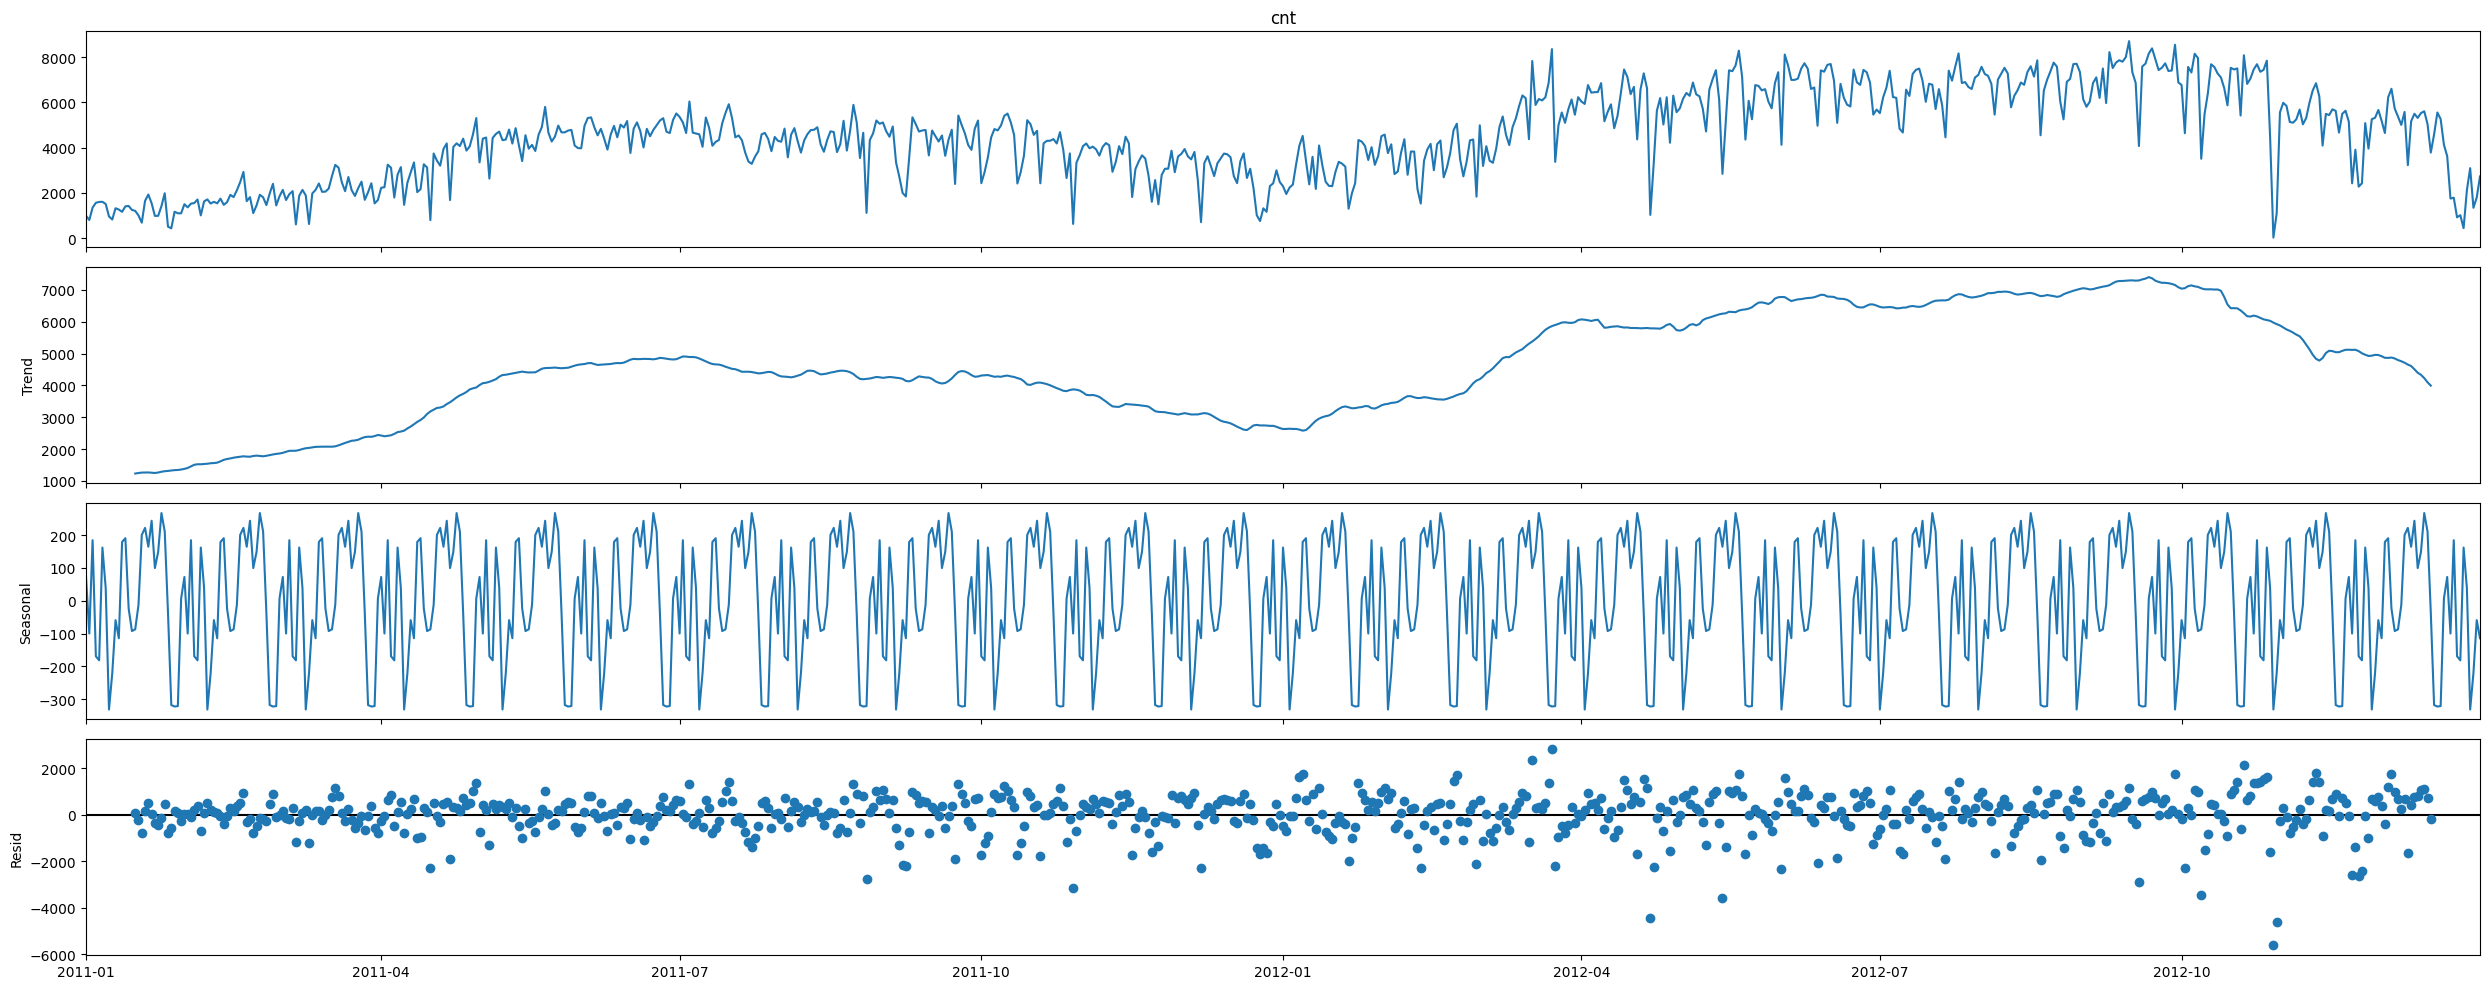

In [66]:
# Resample data to daily frequency for better visualization
df_day_daily = df_day.groupby('dteday')['cnt'].sum()

# Decompose the time series
decomposition = seasonal_decompose(df_day_daily, model='additive', period=30)

# Plot the decomposition
plt.rcParams['figure.figsize'] = (25, 10)
decomposition.plot()
plt.show()

Visualisasi di atas merupakan analisa lanjutan dengan menggunakan time series decomposition. Ini adalah teknik analisis data temporal yang memungkinkan kita memisahkan data menjadi tiga komponen utama:

- Trend: Melihat bagaimana permintaan sepeda berkembang dalam jangka panjang.
- Seasonality: Pola berulang yang terjadi dalam siklus tertentu (harian, mingguan, bulanan).
- Residual: Fluktuasi yang tidak dijelaskan oleh trend dan seasonality.

Di sini saya melakukan analisis tersebut pada kolom cnt berdasarkan kolom dteday dalam periode bulanan. Pada kedua visualisasi tersebut, dapat dilihat bahwa:

- Trend: Terlihat bahwa adanya trend naik walaupun kurang signifikan. Namun terdapat kemungkinan bahwa trend naik akan terus berlanjut seiring waktunya.
- Seasonal: Dapat dilihat bahwa terdapat pola musiman yang berulang pada interval yang tetap. Ini menandakan bahwa terdapat pola musiman yang terjadi tiap bulannya dan tidak ada indikasi fluktuasi yang menandakan adanya pola di luar dari pola musiman.
- Residual: Terlihat bahwa titik-titik grafik tidak mengikuti pola dan terlihat acak. Ini menandakan bahwa tren dan komponen musiman telah menangkap sebagian besar pola dari data yang diberikan.

# Kesimpulan

1. **Bagaimana jumlah rental sepeda terhadap waktunya?**

Jumlah rental sepeda menunjukkan pola musiman yang jelas, dengan peningkatan di pertengahan tahun dan penurunan di awal dan akhir tahun. Hal ini terjadi pada kedua tahun yang dianalisis (2011 dan 2012), meskipun terdapat sedikit perbedaan dalam tingkat peningkatan dan penurunan. Pola ini menunjukkan bahwa musim memengaruhi jumlah rental sepeda, dengan cuaca yang lebih baik di pertengahan tahun (musim panas) cenderung meningkatkan aktivitas bersepeda.

2. **Bagaimana distribusi penyewaan sepeda berdasarkan musimnya?**

Penyewaan sepeda lebih rendah pada musim semi dibandingkan dengan musim lain. Meskipun musim semi cocok untuk bersepeda, pola penurunan ini mungkin dikarenakan posisi musim tersebut pada awal tahun saat jumlah penyewaan sepeda sedang menurun.

3. **Di antara tahun 2011 dan 2012, apakah terdapat perbedaan jumlah penyewaan sepeda?**

Tahun 2012 menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan tahun 2011. Ini menunjukkan tren peningkatan penggunaan sepeda seiring waktu, yang bisa berlanjut jika tidak ada gangguan eksternal. Hal ini mungkin disebabkan oleh peningkatan popularitas bersepeda atau faktor lain yang mendorong penggunaan sepeda lebih luas.

4. **Bagaimana jumlah penyewaan sepeda berdasarkan bulannya?**

Kenaikan jumlah penyewaan terlihat pada bulan-bulan pertengahan tahun, sementara penurunan terjadi pada bulan-bulan awal dan akhir tahun. Ini konsisten dengan pola musiman yang telah dianalisis sebelumnya.

5. **Untuk penyewaan sepeda per jam, bagaimana jumlah penyewaan sepeda berdasarkan jamnya?**

Puncak penyewaan terjadi pada jam 8 pagi dan antara jam 17-18 (jam sibuk kerja), sementara penurunan drastis terjadi antara jam 0-5 dini hari. Pola ini mencerminkan bahwa orang cenderung menyewa sepeda untuk bekerja atau aktivitas sehari-hari selama jam sibuk.

6. **Analisis Korelasi**

Pada data per jam, terdapat korelasi yang sangat tinggi antara kolom registered, casual, dan cnt, karena cnt merupakan hasil penjumlahan dari dua kolom tersebut.

Pada data harian, variabel yang berkorelasi kuat dengan cnt mencakup registered, casual, atemp (suhu yang dirasakan), temp (suhu aktual), dan yr (tahun). Ini menunjukkan bahwa suhu dan faktor temporal (seperti tahun) sangat memengaruhi jumlah penyewaan sepeda.

7. **Analisis Time Series Decomposition**

- Trend: Terlihat ada tren naik, meskipun kurang signifikan, menunjukkan bahwa permintaan sepeda cenderung meningkat seiring waktu.
- Seasonality: Pola musiman yang stabil dan berulang setiap bulan, yang mengindikasikan bahwa siklus permintaan sepeda dipengaruhi oleh musim atau periode dalam tahun.
- Residual: Tidak ada pola yang jelas di komponen residual, yang menandakan bahwa tren dan pola musiman sudah menjelaskan sebagian besar variasi data.

**Kesimpulan Akhir**

Pola musiman sangat kuat dalam memengaruhi jumlah penyewaan sepeda, dengan tren peningkatan penggunaan dari tahun ke tahun. Faktor-faktor seperti suhu dan waktu dalam sehari juga memainkan peran penting dalam menentukan volume sewa sepeda. Implementasi time series decomposition menunjukkan bahwa pola musiman dan tren cukup konsisten, memberikan gambaran yang jelas tentang dinamika penggunaan sepeda dalam periode waktu tertentu.

# Dashboard

In [69]:
! pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00


In [71]:
import streamlit as st

In [80]:
%%writefile /content/dashboard.py
# Preparing Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import streamlit as st

# Load data
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Convert the 'dteday' column to datetime format
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Drop the 'instant' column
df_day.drop('instant', axis=1, inplace=True)
df_hour.drop('instant', axis=1, inplace=True)

# Function to create the boxplot for mnth and cnt
def create_boxplot_mnth(df, title):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='mnth', y='cnt', data=df)
  plt.title(title)
  plt.xlabel('Bulan')
  plt.ylabel('Jumlah Penyewaan Sepeda')
  return plt

# Function to create the boxplot for hr and cnt
def create_boxplot_hr(df, title):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='hr', y='cnt', data=df)
  plt.title(title)
  plt.xlabel('Jam')
  plt.ylabel('Jumlah Penyewaan Sepeda')
  return plt

# Function to create the boxplot for season and cnt
def create_boxplot_season(df, title):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='season', y='cnt', data=df)
  plt.title(title)
  plt.xlabel('Musim')
  plt.ylabel('Jumlah Penyewaan Sepeda')
  return plt

# Function to create the boxplot for yr and cnt
def create_boxplot_yr(df, title):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='yr', y='cnt', data=df, hue='yr')
  plt.title(title)
  plt.xlabel('Tahun')
  plt.ylabel('Jumlah Penyewaan Sepeda')
  return plt


# Function to create the lineplot for dteday and cnt
def create_lineplot_dteday(df, title):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='dteday', y='cnt', data=df)
    plt.title(title)
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penyewaan Sepeda')
    plt.xticks(rotation=45)
    return plt

def create_lineplot_mnth(df, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='mnth', y='cnt', data=df)
    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Penyewaan Sepeda')
    return plt

# Function to create the heatmap for correlation
def create_heatmap_correlation(df, title):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    return plt

# Function to create the time series decomposition plot
def create_time_series_decomposition(df, title):
    df_daily = df.groupby('dteday')['cnt'].sum()
    decomposition = seasonal_decompose(df_daily, model='additive', period=30)
    plt.rcParams['figure.figsize'] = (25, 10)
    decomposition.plot()
    return plt


# Streamlit dashboard
st.title('Bike Sharing Data Analysis Dashboard')

# Sidebar navigation
st.sidebar.title('Navigation')
selected_tab = st.sidebar.radio('Select Tab', ['Visualisasi & Analisis Deskriptif', 'Analisis Lanjutan'])


# Visualisasi & Analisis Deskriptif
if selected_tab == 'Visualisasi & Analisis Deskriptif':
    st.header('Visualisasi & Analisis Deskriptif')

    st.subheader('Distribusi Jumlah Penyewaan Sepeda terhadap Waktu')
    st.pyplot(create_lineplot_dteday(df_day, 'Distribusi Jumlah Penyewaan Sepeda per Hari terhadap Waktu'))
    st.pyplot(create_lineplot_dteday(df_hour, 'Distribusi Jumlah Penyewaan Sepeda per Jam terhadap Waktu'))

    st.subheader('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim')
    st.pyplot(create_boxplot_season(df_day, 'Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim'))
    st.pyplot(create_boxplot_season(df_hour, 'Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Musim'))

    st.subheader('Perbedaan Jumlah Penyewaan Sepeda Antara Tahun 2011 dan 2012')
    st.pyplot(create_boxplot_yr(df_day, 'Distribusi Jumlah Penyewaan Sepeda per Hari Berdasarkan Tahun'))
    st.pyplot(create_boxplot_yr(df_hour, 'Distribusi Jumlah Penyewaan Sepeda per Jam Berdasarkan Tahun'))

    st.subheader('Jumlah Penyewaan Sepeda Berdasarkan Bulan')
    st.pyplot(create_lineplot_mnth(df_day, 'Distribusi Jumlah Penyewaan Sepeda per Hari terhadap Bulan'))
    st.pyplot(create_lineplot_mnth(df_hour, 'Distribusi Jumlah Penyewaan Sepeda per Jam terhadap Bulan'))

    st.subheader('Jumlah Penyewaan Sepeda Berdasarkan Jam')
    st.pyplot(create_boxplot_hr(df_hour, 'Distribusi Jumlah Penyewaan Sepeda terhadap Jam'))

# Analisis Lanjutan
elif selected_tab == 'Analisis Lanjutan':
    st.header('Analisis Lanjutan')

    st.subheader('Analisis Korelasi')
    st.pyplot(create_heatmap_correlation(df_hour, 'Correlation Matrix of df_hour'))
    st.pyplot(create_heatmap_correlation(df_day, 'Correlation Matrix of df_day'))

    st.subheader('Time Series Decomposition')
    st.pyplot(create_time_series_decomposition(df_day, 'Time Series Decomposition of df_day'))
    st.pyplot(create_time_series_decomposition(df_hour, 'Time Series Decomposition of df_hour'))

Writing /content/dashboard.py


In [79]:
!streamlit run /content/dashboard.py &>/dev/null&
!npx localtunnel --port 8501

^C
